<a href="https://colab.research.google.com/github/LeandroJorquera/synthetic_L1/blob/main/ORF2_DMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def alphabet_to_mat_position(x, alphabet):
    return alphabet[x]

def mat_position_to_alphabet(x, alphabet):
    inv_map = {v: k for k, v in alphabet.items()}
    return inv_map[x]

alph = {'A': 0, 'R': 1, 'N': 2, 'D': 3, 'C': 4, 'Q': 5 ,'E': 6, 'G': 7, 'H': 8, 'I': 9, 'L': 10, 'K': 11, 'M': 12, 'F': 13, 'P': 14, 'S': 15, 'T': 16, 'W': 17, 'Y': 18, 'V': 19}

In [3]:
def plot_DMS_heatmap(full_mutations_matrix, alph, ref_seq = None, figsize = (30, 100)):
    
    alphabet = ''.join(alph.keys())

    # Create a heatmap of the mutations
    fig, ax = plt.subplots(figsize = figsize)
    im = ax.imshow(full_mutations_matrix, cmap='RdYlBu')

    ax.set_xticks(np.arange(len(alphabet)))
    ax.set_xticklabels(list(alphabet))
    
    yticks = np.arange(0, full_mutations_matrix.shape[0], 10) - 1
    yticks[0] = 0
    
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticks + 1)

    # Rotate the x-axis labels for better readability
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor");

    cbar = ax.figure.colorbar(im, ax=ax, fraction = 0.01)
    
    return fig, ax

# ORF2

## Import EMS1-v output 

In [4]:
ref_seq_ORF2 = "MTGSNSHITILTLNINGLNSAIKRHRLASWIKSQDPSVCCIQETHLTCRDTHRLKIKGWRKIYQANGKQKKAGVAILVSDKTDFKPTKIKRDKEGHYIMVKGSIQQEELTILNIYAPNTGAPRFIKQVLSDLQRDLDSHTLIMGDFNTPLSTLDRSTRQKVNKDTQELNSALHQADLIDIYRTLHPKSTEYTFFSAPHHTYSKIDHIVGSKALLSKCKRTEIITNYLSDHSAIKLELRIKNLTQSRSTTWKLNNLLLNDYWVHNEMKAEIKMFFETNENKDTTYQNLWDAFKAVCRGKFIALNAYKRKQERSKIDTLTSQLKELEKQEQTHSKASRRQEITKIRAELKEIETQKTLQKINESRSWFFERINKIDRPLARLIKKKREKNQIDTIKNDKGDITTDPTEIQTTIREYYKHLYANKLENLEEMDTFLDTYTLPRLNQEEVESLNRPITGSEIVAIINSLPTKKSPGPDGFTAEFYQRYKEELVPFLLKLFQSIEKEGILPNSFYEASIILIPKPGRDTTKKENFRPISLMNIDAKILNKILANRIQQHIKKLIHHDQVGFIPGMQGWFNIRKSINVIQHINRAKDKNHMIISIDAEKAFDKIQQPFMLKTLNKLGIDGTYFKIIRAIYDKPTANIILNGQKLEAFPLKTGTRQGCPLSPLLFNIVLEVLARAIRQEKEIKGIQLGKEEVKLSLFADDMIVYLENPIVSAQNLLKLISNFSKVSGYKINVQKSQAFLYTNNRQTESQIMGELPFTIASKRIKYLGIQLTRDVKDLFKENYKPLLKEIKEETNKWKNIPCSWVGRINIVKMAILPKVIYRFNAIPIKLPMTFFTELEKTTLKFIWNQKRARIAKSILSQKNKAGGITLPDFKLYYKATVTKTAWYWYQNRDIDQWNRTEPSEIMPHIYNYLIFDKPEKNKQWGKDSLFNKWCWENWLAICRKLKLDPFLTPYTKINSRWIKDLNVKPKTIKTLEENLGITIQDIGVGKDFMSKTPKAMATKDKIDKWDLIKLKSFCTAKETTIRVNRQPTTWEKIFATYSSDKGLISRIYNELKQIYKKKTNNPIKKWAKDMNRHFSKEDIYAAKKHMKKCSSSLAIREMQIKTTMRYHLTPVRMAIIKKSGNNRCWRGCGEIGTLLHCWWDCKLVQPLWKSVWRFLRDLELEIPFDPAIPLLGIYPNEYKSCCYKDTCTRMFIAALFTIAKTWNQPKCPTMIDWIKKMWHIYTMEYYAAIKNDEFISFVGTWMKLETIILSKLSQEQKTKHRIFSLIGGN"
sequence_chunk_1 = ref_seq_ORF2[:1022]
sequence_chunk_2 = ref_seq_ORF2[-1022:]

In [5]:
len(ref_seq_ORF2)

1275

In [7]:
# Load protein chunks and drop unwanted columns
chunk_1_df_ORF2 = pd.read_csv('/Users/leandro/Desktop/ai_data/DMS_ORF2/ORF2_chunk1.csv').drop(['Unnamed: 0.1', 'Unnamed: 0', '--'], axis = 1)
chunk_2_df_ORF2 = pd.read_csv('/Users/leandro/Desktop/ai_data/DMS_ORF2/ORF2_chunk2.csv').drop(['Unnamed: 0.1', 'Unnamed: 0', '--'], axis = 1)

# Rename colums with the name of each model
chunk_1_df_ORF2 = chunk_1_df_ORF2.rename(columns={"/content/drive/Shareddrives/ESM_for_variant_prediction/esm1v_t33_650M_UR90S_1.pt": "esm1v_t33_650M_UR90S_1", "/content/drive/Shareddrives/ESM_for_variant_prediction/esm1v_t33_650M_UR90S_2.pt": "esm1v_t33_650M_UR90S_2","/content/drive/Shareddrives/ESM_for_variant_prediction/esm1v_t33_650M_UR90S_3.pt": "esm1v_t33_650M_UR90S_3","/content/drive/Shareddrives/ESM_for_variant_prediction/esm1v_t33_650M_UR90S_4.pt": "esm1v_t33_650M_UR90S_4", "/content/drive/Shareddrives/ESM_for_variant_prediction/esm1v_t33_650M_UR90S_5.pt": "esm1v_t33_650M_UR90S_5"})
chunk_2_df_ORF2 = chunk_2_df_ORF2.rename(columns={"/content/drive/Shareddrives/ESM_for_variant_prediction/esm1v_t33_650M_UR90S_1.pt": "esm1v_t33_650M_UR90S_1", "/content/drive/Shareddrives/ESM_for_variant_prediction/esm1v_t33_650M_UR90S_2.pt": "esm1v_t33_650M_UR90S_2","/content/drive/Shareddrives/ESM_for_variant_prediction/esm1v_t33_650M_UR90S_3.pt": "esm1v_t33_650M_UR90S_3","/content/drive/Shareddrives/ESM_for_variant_prediction/esm1v_t33_650M_UR90S_4.pt": "esm1v_t33_650M_UR90S_4", "/content/drive/Shareddrives/ESM_for_variant_prediction/esm1v_t33_650M_UR90S_5.pt": "esm1v_t33_650M_UR90S_5"})

# Ensemble column contains the mean of the 5 models
chunk_1_df_ORF2['ensemble'] = chunk_1_df_ORF2[['esm1v_t33_650M_UR90S_1', 'esm1v_t33_650M_UR90S_2', 'esm1v_t33_650M_UR90S_3', 'esm1v_t33_650M_UR90S_4', 'esm1v_t33_650M_UR90S_5']].mean(axis=1)
chunk_1_df_ORF2['values'] = [int(i[1:-1]) - 1 for i in chunk_1_df_ORF2['mutant'].values]
chunk_1_df_ORF2['mutation_mat_position'] = [alphabet_to_mat_position(i[-1], alph) for i in chunk_1_df_ORF2['mutant'].values]


chunk_2_df_ORF2['ensemble'] = chunk_2_df_ORF2[['esm1v_t33_650M_UR90S_1', 'esm1v_t33_650M_UR90S_2', 'esm1v_t33_650M_UR90S_3', 'esm1v_t33_650M_UR90S_4', 'esm1v_t33_650M_UR90S_5']].mean(axis=1)
chunk_2_df_ORF2['values'] = [int(i[1:-1]) - 1 for i in chunk_2_df_ORF2['mutant'].values]
chunk_2_df_ORF2['mutation_mat_position'] = [alphabet_to_mat_position(i[-1], alph) for i in chunk_2_df_ORF2['mutant'].values]

In [8]:
chunk_1_df_ORF2.nsmallest(20, 'ensemble')

,mutant,esm1v_t33_650M_UR90S_1,esm1v_t33_650M_UR90S_2,esm1v_t33_650M_UR90S_3,esm1v_t33_650M_UR90S_4,esm1v_t33_650M_UR90S_5,ensemble,values,mutation_mat_position
269,N14M,-13.634295,-16.455540,-16.750452,-15.655837,-17.917467,-16.082718,13,12
279,N14W,-14.245770,-15.453771,-14.659886,-16.873657,-18.242783,-15.895173,13,17
271,N14P,-13.375990,-16.838825,-15.798401,-16.287895,-15.639086,-15.588039,13,14
12044,K603F,-15.534812,-12.849681,-15.068329,-16.975477,-17.440926,-15.573845,602,13
2939,N147W,-13.412199,-17.009327,-15.381668,-16.469343,-15.267339,-15.507975,146,17
277,N14V,-12.754495,-15.004375,-15.601057,-16.822838,-17.093475,-15.455248,13,19
3579,D179W,-14.395845,-14.800409,-16.713512,-16.616314,-14.570566,-15.419329,178,17
11544,K578F,-15.313772,-16.685844,-14.249469,-14.870474,-15.945980,-15.413108,577,13
10879,N544W,-15.615071,-15.543251,-15.652752,-14.006945,-15.728771,-15.309358,543,17
2891,D145P,-16.329742,-13.895046,-16.107079,-14.840755,-14.989118,-15.232348,144,14


In [9]:
chunk_1_df_ORF2.nlargest(5, 'ensemble')

,mutant,esm1v_t33_650M_UR90S_1,esm1v_t33_650M_UR90S_2,esm1v_t33_650M_UR90S_3,esm1v_t33_650M_UR90S_4,esm1v_t33_650M_UR90S_5,ensemble,values,mutation_mat_position
9163,V459E,8.720760,6.372630,6.984212,6.209625,8.211494,7.299744,458,6
12528,F627L,5.564013,6.361697,7.154180,6.259024,6.037593,6.275301,626,10
18272,Y914Q,4.313301,4.422538,6.073708,4.775017,7.021175,5.321148,913,5
15882,E795D,3.907670,5.566710,5.862510,4.323903,5.918345,5.115827,794,3
4515,Y226T,4.660496,1.819447,5.417360,6.006752,5.615725,4.703956,225,16


In [10]:
chunk_2_df_ORF2.nlargest(20, 'ensemble')

,mutant,esm1v_t33_650M_UR90S_1,esm1v_t33_650M_UR90S_2,esm1v_t33_650M_UR90S_3,esm1v_t33_650M_UR90S_4,esm1v_t33_650M_UR90S_5,ensemble,values,mutation_mat_position
4103,V206E,7.552670,5.673952,6.907425,6.280047,7.809106,6.844640,205,6
7468,F374L,5.565409,6.387414,7.272397,5.647736,5.641642,6.102919,373,10
15040,D753A,5.505961,5.316373,5.151826,6.450374,5.680551,5.621017,752,0
15623,T782E,5.455226,4.618614,4.110181,5.944641,6.492028,5.324138,781,6
10822,E542D,4.836775,5.095453,5.107831,4.479001,5.511329,5.006078,541,3
16710,K836N,3.136742,5.179625,5.785435,4.422707,5.392360,4.783374,835,2
19262,I964D,4.534755,3.839846,5.515220,5.156261,4.625191,4.734255,963,3
9,N1M,4.760582,4.194140,5.544989,4.543756,3.811224,4.570938,0,12
16669,A834M,6.121014,4.469763,1.396760,4.602065,5.478177,4.413556,833,12
13090,M655N,6.086538,-0.898263,7.764616,6.407985,2.308894,4.333954,654,2


# Generate heatmap from score matrix

In [11]:
temp_1 = np.array(list(chunk_1_df_ORF2[['values', 'ensemble']].groupby('values').ensemble.apply(list).reset_index()['ensemble'].values))
temp_2 = np.array(list(chunk_1_df_ORF2[['values', 'mutation_mat_position']].groupby('values').mutation_mat_position.apply(list).reset_index()['mutation_mat_position'].values))

a = np.zeros((1022, 20))*np.nan
for j in range(1022):
    for i in zip(temp_1[j, :], temp_2[j, :]):
        a[j, i[1]] = i[0]
        
del temp_1, temp_2
        
temp_1 = np.array(list(chunk_2_df_ORF2[['values', 'ensemble']].groupby('values').ensemble.apply(list).reset_index()['ensemble'].values))
temp_2 = np.array(list(chunk_2_df_ORF2[['values', 'mutation_mat_position']].groupby('values').mutation_mat_position.apply(list).reset_index()['mutation_mat_position'].values))

b = np.zeros((1022, 20))*np.nan
for j in range(1022):
    for i in zip(temp_1[j, :], temp_2[j, :]):
        b[j, i[1]] = i[0]
        
del temp_1, temp_2

DMS_matrix_ORF2 = np.vstack([a[:800, :], b[-475:, :]])

DMS_matrix_ORF2[DMS_matrix_ORF2 == 0.] = np.nan

del a, b

In [19]:
temp_1 = np.array(list(chunk_1_df_ORF2[['values', 'ensemble']].groupby('values').ensemble.apply(list).reset_index()['ensemble'].values))
temp_2 = np.array(list(chunk_1_df_ORF2[['values', 'mutation_mat_position']].groupby('values').mutation_mat_position.apply(list).reset_index()['mutation_mat_position'].values))

a = np.zeros((1022, 20))*np.nan
for j in range(1022):
    for i in zip(temp_1[j, :], temp_2[j, :]):
        a[j, i[1]] = i[0]
        
del temp_1, temp_2
        
temp_1 = np.array(list(chunk_2_df_ORF2[['values', 'ensemble']].groupby('values').ensemble.apply(list).reset_index()['ensemble'].values))
temp_2 = np.array(list(chunk_2_df_ORF2[['values', 'mutation_mat_position']].groupby('values').mutation_mat_position.apply(list).reset_index()['mutation_mat_position'].values))

b = np.zeros((1022, 20))*np.nan
for j in range(1022):
    for i in zip(temp_1[j, :], temp_2[j, :]):
        b[j, i[1]] = i[0]
        
del temp_1, temp_2

DMS_matrix_ORF2 = np.vstack([a[:800, :], b[-475:, :]])

DMS_matrix_ORF2[DMS_matrix_ORF2 == 0.] = np.nan

del a, b

The line below produces an histogram of the scores obtained by the model

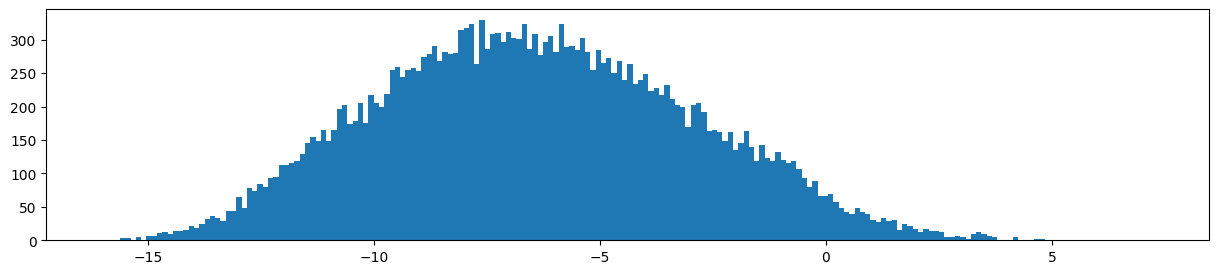

In [ ]:
fig, ax = plt.subplots(figsize = (15, 3))
plt.hist(DMS_matrix_ORF2.flatten(), bins = 200);

The line below produces a heatmap for the DMS. The positions containing the wild type AA contain a nan value, that in the heatmap is a white square. 
The other values contain a score of each mutation, negative (red) means that this mutation is deleterious respect to the wild tipe AA, positive (blue) means that that mutation is a good mutation for that AA. 

One way in which we first evaluated whether the model worked or not on PB and Cas9 was to see the effect of mutations to positions known to be very delicate and potentially damaging for the protein. 

# Plot DMS heatmap for whole protein

In [12]:
def plot_DMS_heatmap(full_mutations_matrix, alph, ref_seq = None, figsize = (30, 100)):
    
    alphabet = ''.join(alph.keys())

    # Create a heatmap of the mutations
    fig, ax = plt.subplots(figsize = figsize)
    im = ax.imshow(full_mutations_matrix.T, cmap='RdYlBu', aspect = 'auto')

    ax.set_yticks(np.arange(len(alphabet)))
    ax.set_yticklabels(list(alphabet))
    
    xticks = np.arange(0, full_mutations_matrix.shape[0], 10) - 1
    xticks[0] = 0
    
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks + 1)

    # Rotate the x-axis labels for better readability
    plt.setp(ax.get_yticklabels(), rotation=45, ha="right", rotation_mode="anchor");

    cbar = ax.figure.colorbar(im, ax=ax, fraction = 0.01)
    
    return fig, ax

In [13]:
plot_DMS_heatmap(DMS_matrix_ORF2, alph, figsize=(200,50));

The following cell plots the profile of the mutations along the protein. I also coloured the background according to the domains (which in this case are referred to Cas9 domains). You can change it to put your domains there. This can be helpful to visualize the domains that on average contain more delicate or more variable AA. It can give another insight into how the algorithm worked for your protein. 

# Mutation score plot highliting domains

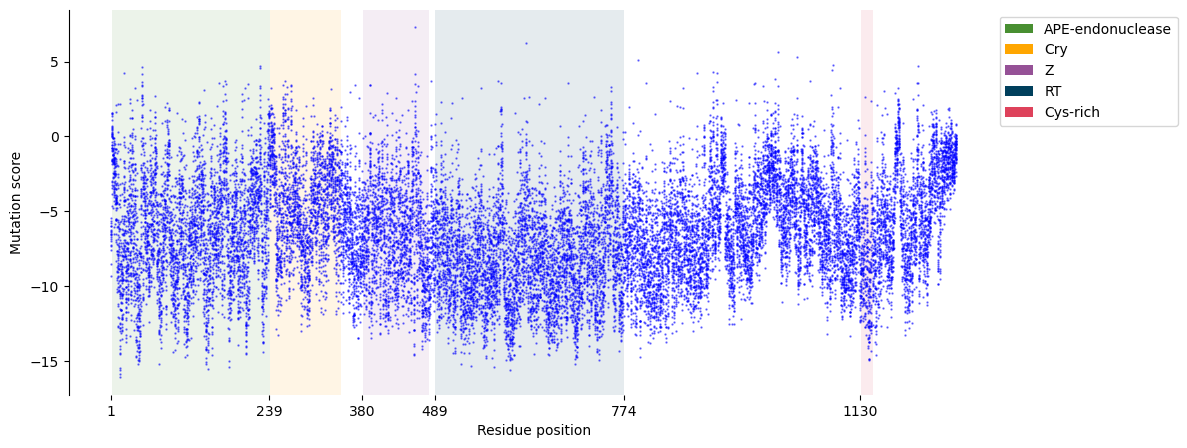

In [31]:
fig, ax = plt.subplots(1, figsize = (12, 5))

ax.axvspan(xmin=1,    xmax=239,   ymin=0, linewidth=0, color='#488f31',     alpha = 0.1, label = 'APE-endonuclease');
ax.axvspan(xmin=239,   xmax=347,  ymin=0, linewidth=0, color='#ffa600' ,      alpha = 0.1, label = 'Cry');
ax.axvspan(xmin=380,  xmax=480,  ymin=0, linewidth=0, color='#955196',       alpha = 0.1, label = 'Z');
ax.axvspan(xmin=498,   xmax=773,   ymin=0, linewidth=0, color='#003f5c',     alpha = 0.1, label = 'RT');
ax.axvspan(xmin=1130,  xmax=1148, ymin=0, linewidth=0, color='#de425b',     alpha = 0.1, label = 'Cys-rich');

ax.set_xlabel('Residue position')
ax.set_ylabel('Mutation score')
ax.set_xticks([0, 238, 379, 488, 773, 1129])
ax.set_xticklabels([1, 239, 380, 489, 774, 1130])

for i in range(20):
    ax.scatter(np.arange(0, DMS_matrix_ORF2.shape[0]), DMS_matrix_ORF2[:, i], s = 0.5, color = 'blue', alpha = 0.5)
    
ax.spines[['right', 'top', 'bottom']].set_visible(False)
legend = ax.legend(bbox_to_anchor=(1.2, 1));
for lh in legend.legend_handles: 
    lh.set_alpha(1)
    
fig.savefig("/Users/leandrojorqueravalero/Desktop/PhD/synthetic_ORF2/plots/ORF2eus_DSM_domains.png", dpi = 150)

# heatmap for RT domain 

In [51]:
RT_score = DMS_matrix_ORF2[497:773]
RT_score.shape[0]

276

In [55]:
plot_RT_heatmap(RT_score, alph, figsize=(200,50));

**First aminoacid in the plot is actually is actually position 498**

In [56]:
numbers = [92, 94, 120, 130, 216, 242, 250, 251, 253, 257, 258]
def number_to_amino(numbers):
    hot_residues = []
    for i in numbers:
        res = i + 497  # give residue actual position in the protein
        hot_residues.append(res)
    return hot_residues

In [86]:
# Extract residues positions from numbers in the plot
hot_residues = number_to_amino(numbers)
hot_residues

[589, 591, 617, 627, 713, 739, 747, 748, 750, 754, 755]

In [96]:
hot_mutants = chunk_1_df_ORF2[chunk_1_df_ORF2['mutant'].str.contains('|'.join(map(str, hot_residues)), regex=True)] # selecting rows of desired residues 
hot_mutants.sort_values(by=['ensemble'], ascending=False) # sorting in descending order
hot_mutants.nlargest(10, 'ensemble') # show top 10

,mutant,esm1v_t33_650M_UR90S_1,esm1v_t33_650M_UR90S_2,esm1v_t33_650M_UR90S_3,esm1v_t33_650M_UR90S_4,esm1v_t33_650M_UR90S_5,ensemble,values,mutation_mat_position
12528,F627L,5.564013,6.361697,7.154180,6.259024,6.037593,6.275301,626,10
11768,A589L,3.410896,4.076178,4.987089,1.615200,3.657591,3.549391,588,10
15093,G755R,3.842416,5.289731,1.771762,3.561114,2.094624,3.311929,754,1
15096,G755K,4.093465,2.664460,2.615330,4.524808,1.425601,3.064733,754,11
15092,G755Q,3.473499,1.092185,1.534842,3.667253,1.871094,2.327774,754,5
15090,G755N,2.176240,1.423958,1.396881,3.136652,2.800883,2.186923,754,2
11769,A589M,2.530207,2.835604,3.129440,-0.342580,1.553793,1.941293,588,12
15076,M754K,3.166951,1.930279,3.096208,2.115512,-0.830270,1.895736,753,11
11773,A589R,4.279308,1.610326,1.953622,-0.366359,1.775806,1.850541,588,1
11776,A589K,4.905245,2.044049,2.154730,-0.523305,0.467516,1.809647,588,11
